In [1]:
import tensorflow as tf
from tensorflow.python.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3

In [3]:
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2129 files belonging to 3 classes.


In [4]:
class_names= image_dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(image_dataset)

67

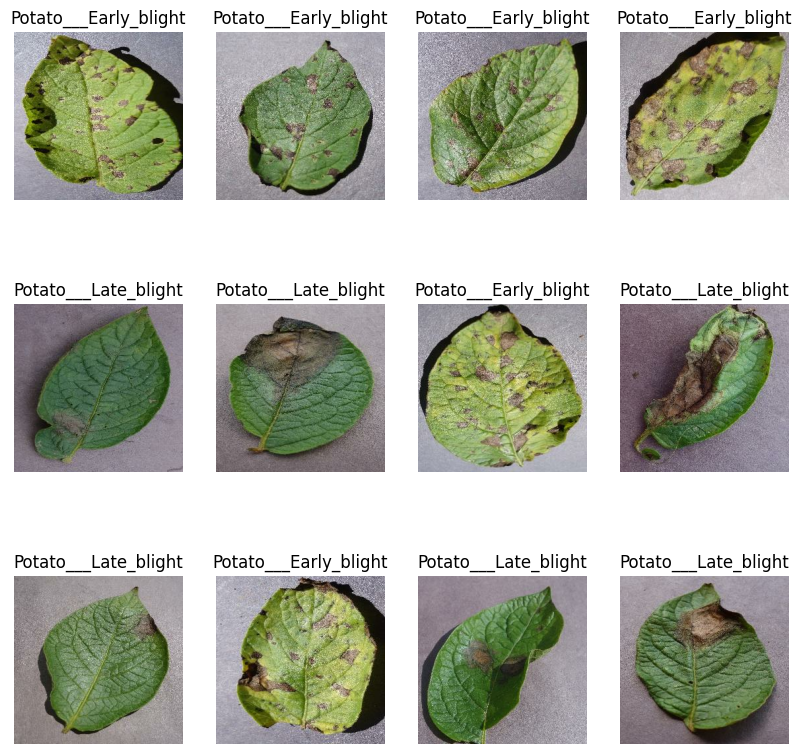

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in image_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
# 80% training
# 20%  -> 10%test 10% validation

In [8]:
train_size = 0.8
len(image_dataset)*train_size

53.6

In [9]:
train_ds = image_dataset.take(53)
len(train_ds)

53

In [10]:
test_ds = image_dataset.skip(53)
len(test_ds)

14

In [11]:
val_ds = test_ds.take(6)

In [12]:
test_ds = test_ds.skip(6)

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)                                           
])

In [15]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)                                           
])

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu' ,input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (32, 256, 256, 3)         0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

In [18]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics=['accuracy']
)

In [19]:
EPOCHS = 20

In [20]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/20
35/53 [==================>...........] - ETA: 52s - loss: 0.8964 - accuracy: 0.4705

KeyboardInterrupt: 

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 8s 453ms/step - loss: 0.2627 - accuracy: 0.9295


Image to be predicted
actual label: Potato___Early_blight
Predicted Class: Potato___Early_blight


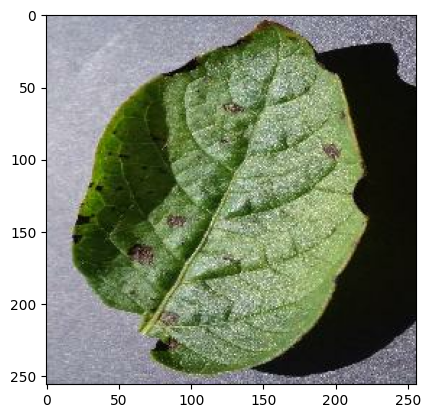

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    img = images_batch[0].numpy().astype('uint8')
    img_label = labels_batch[0].numpy()
    print("Image to be predicted")
    plt.imshow(img)
    print('actual label:', class_names[img_label])

    batch_predictions = model.predict(images_batch)
    print('Predicted Class:', class_names[np.argmax(batch_predictions[0])])

In [ ]:
def predict(model,img):
    img_arr = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_arr = tf.expand_dims(img_arr, 0)

    predictions = model.predict(img_arr)
    predict_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predict_class, confidence
    


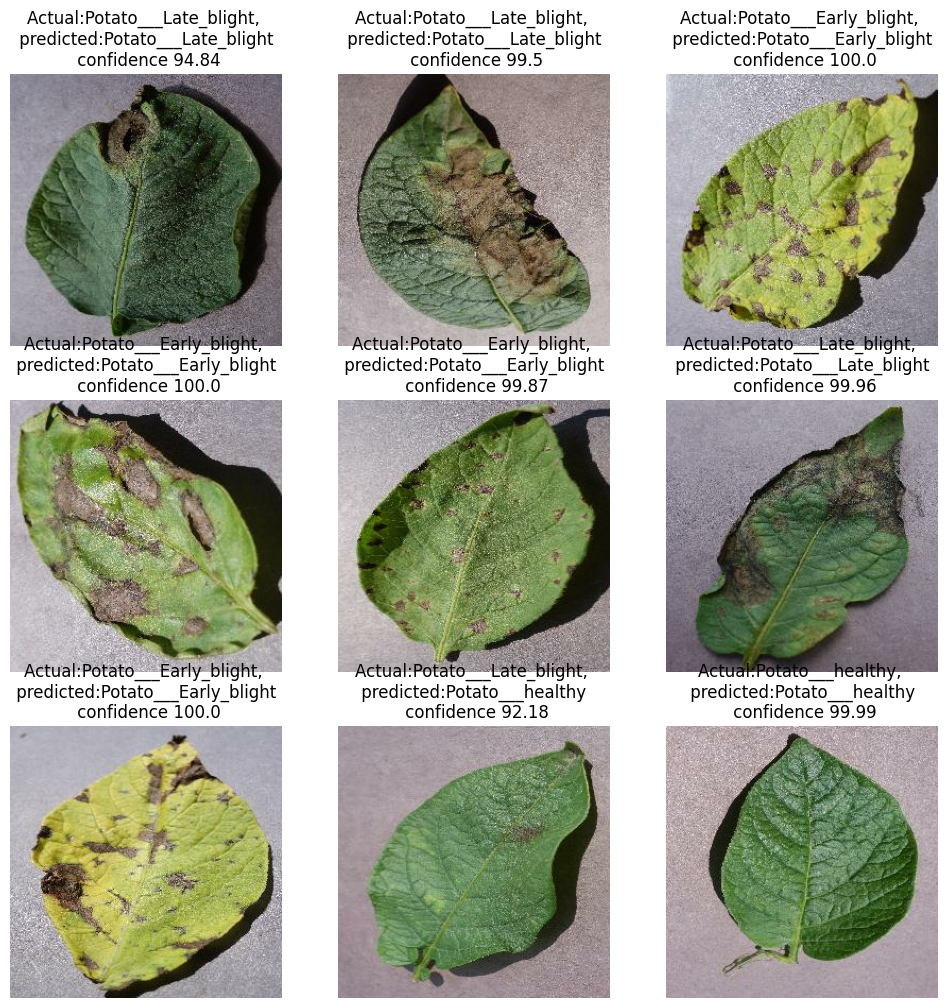

In [ ]:
plt.figure(figsize=(12,12))

for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3 ,3, 1+i)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i])
        actual_label = class_names[labels[i]]
        plt.title(f"Actual:{actual_label}, \n predicted:{predicted_class} \n confidence {confidence}")
        plt.axis('off')

In [ ]:
model.save("/Sp_Projects/potato_disease_predictor/potatoes.h5")

NameError: name 'model' is not defined